In [74]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tensorboardX import SummaryWriter
import torchvision.models as models
import torchvision.utils as vutils
from torchvision import datasets
%matplotlib inline

## Create Graphs in Tensorboard

## Create some toy data with 3 classes which are not linearly separable

In [75]:
r = np.tile(np.r_[0:1:100j],3)

t = np.r_[0:np.pi*4:300j] + np.random.rand(300)

x_train = np.c_[r*np.sin(t), r*np.cos(t)]

y_train = np.arange(3).repeat(100)

In [76]:
x_train.shape

(300, 2)

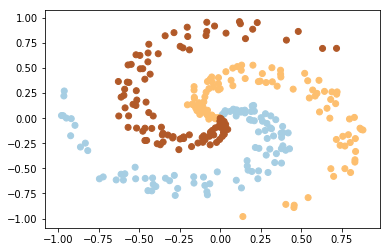

In [77]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.Paired)

## Create a Neural Network Model

In [121]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layer, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layer, hidden_layer)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_layer, num_classes)
        
    def forward(self, X):
        out = self.fc1(X)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        
        return out
    
    def predict(self, X):
        y_score = self.forward(X)
        return torch.max(y_score, 1)[1]
    
    def plot_decision_boundary(self, X, y):
        x1_min, x2_min = X.min(0) - 0.5
        x1_max, x2_max = X.max(0) + 0.5
        x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
        xx = np.c_[x1.ravel(), x2.ravel()]
        #print(xx.shape)
        yy = self.predict(torch.from_numpy(xx.astype(np.float32)))
        #print(yy.shape)
        plt.pcolormesh(x1,x2,yy.reshape(x1.shape), cmap=plt.cm.Paired)
        plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k',cmap=plt.cm.Paired)
        plt.show()
        
        return 
        
    def plot_to_numpy(self, X, y):
        from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
        from matplotlib.figure import Figure

        x1_min, x2_min = X.min(0) - 0.5
        x1_max, x2_max = X.max(0) + 0.5
        x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
        xx = np.c_[x1.ravel(), x2.ravel()]
        yy = self.predict(torch.from_numpy(xx.astype(np.float32)))
        fig = Figure()
        canvas = FigureCanvas(fig)
        ax = fig.gca()
        ax.pcolormesh(x1,x2,yy.reshape(x1.shape), cmap=plt.cm.Paired)
        ax.scatter(X[:,0], X[:,1], c=y, edgecolors='k',cmap=plt.cm.Paired)
        ax.axis('off')
        canvas.draw()       # draw the canvas, cache the renderer
        width, height = fig.get_size_inches() * fig.get_dpi() 
        image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
        print(image.shape)
        image = image.reshape(int(height),int(width),3)

        return image

In [122]:
model = NeuralNet(2, 16, 3)

In [123]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [124]:
writer = SummaryWriter()

In [84]:
dummy_img = torch.rand(32, 3, 64, 64)  # output from network
x = vutils.make_grid(dummy_img, normalize=True, scale_each=True)
writer.add_image('Image', x, 1)

In [86]:
x.shape

torch.Size([3, 266, 530])

In [ ]:
def plot_to_numpy()

In [88]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.gca()

ax.scatter(x_train[:,0], x_train[:,1],c=y_train)
ax.axis('off')

canvas.draw()       # draw the canvas, cache the renderer

image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')

In [89]:
image.shape

(373248,)

In [87]:
writer.add_image('Image2', image.reshape(288,432,3),1)

In [113]:
image

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

Loss is 1.0942347049713135, accuracy is: 0.3333333333333333 at epoch 0


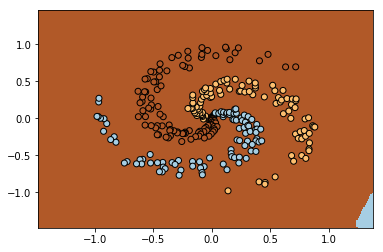

(373248,)
Loss is 0.8583006858825684, accuracy is: 0.5366666666666666 at epoch 1000


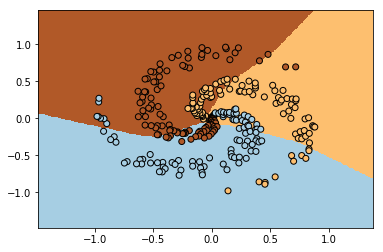

(373248,)
Loss is 0.6895255446434021, accuracy is: 0.62 at epoch 2000


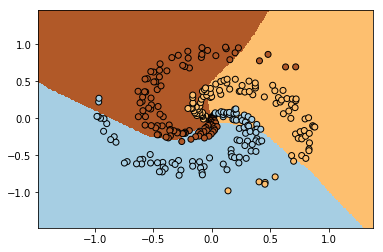

(373248,)
Loss is 0.5807254910469055, accuracy is: 0.7066666666666667 at epoch 3000


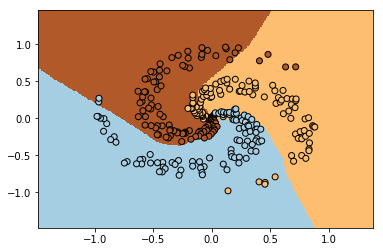

(373248,)
Loss is 0.4718666672706604, accuracy is: 0.7766666666666666 at epoch 4000


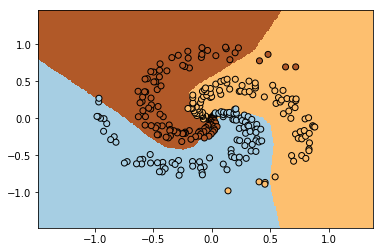

(373248,)
Loss is 0.36042913794517517, accuracy is: 0.8466666666666667 at epoch 5000


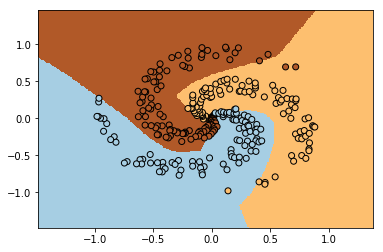

(373248,)
Loss is 0.27288123965263367, accuracy is: 0.89 at epoch 6000


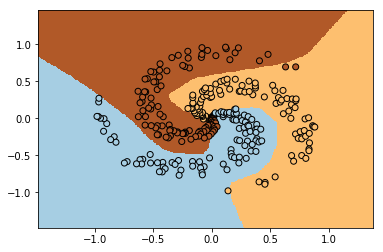

(373248,)
Loss is 0.20725177228450775, accuracy is: 0.93 at epoch 7000


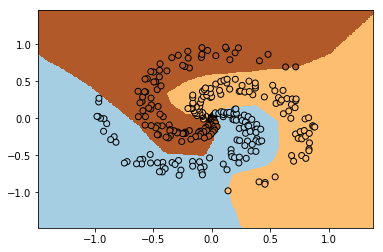

(373248,)
Loss is 0.1584465503692627, accuracy is: 0.9433333333333334 at epoch 8000


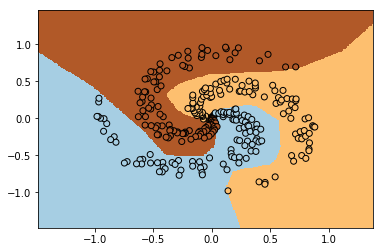

(373248,)
Loss is 0.12427818030118942, accuracy is: 0.9566666666666667 at epoch 9000


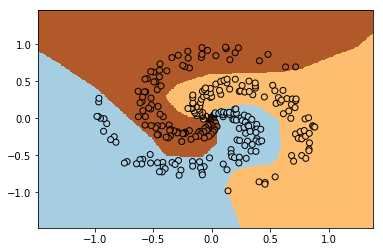

(373248,)
Loss is 0.09819135069847107, accuracy is: 0.9766666666666667 at epoch 10000


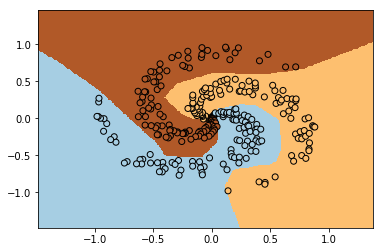

(373248,)


In [125]:
for epoch in range(10001):
    y_pred_score = model(torch.from_numpy(x_train.astype(np.float32)))
    loss = loss_fn(y_pred_score, torch.from_numpy(y_train.astype(np.int64)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%1000==0:
        y_pred = model.predict(torch.from_numpy(x_train.astype(np.float32))).detach().numpy()
        acc = (y_pred==y_train).sum()/len(y_train)
        print(f'Loss is {loss}, accuracy is: {acc} at epoch {epoch}')
        model.plot_decision_boundary(x_train, y_train)
        writer.add_scalar('data/loss', loss.item(), epoch)
        writer.add_scalar('data/accuracy', acc, epoch)
        writer.add_image(f'Decision Boundary {epoch}', model.plot_to_numpy(x_train, y_train),1)

In [ ]:
dummy_img = torch.rand(32, 3, 64, 64)  # output from network

In [ ]:
x = vutils.make_grid(dummy_img, normalize=True, scale_each=True)

In [ ]:
x.max()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.scatter(x_train[:,0], x_train[:,1],c=y_train)
ax.set_title('a simple figure')
fig.canvas.draw()

(<matplotlib.figure.Figure at 0x589f6a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a901630>)

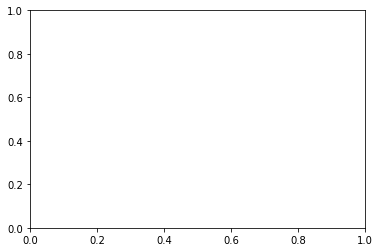

In [3]:
plt.subplots()

In [ ]:
X.shape

In [ ]:
319638/(360*360)

In [ ]:
# Now we can save it to a numpy array.
data = np.frombuffer (fig.canvas.tostring_rgb(), dtype=np.uint8)
#data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [ ]:
data.shape

In [ ]:
width, height = fig.get_size_inches() * fig.get_dpi() 
img =  np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8).reshape(height, width, 3)

In [ ]:
np.frombuffer (fig.canvas.tostring_rgb(), dtype=np.uint8).shape

In [ ]:
319638/360/360

In [39]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.gca()

ax.scatter(x_train[:,0], x_train[:,1],c=y_train)
ax.axis('off')

canvas.draw()       # draw the canvas, cache the renderer

image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')

In [40]:
width, height = fig.get_size_inches() * fig.get_dpi() 

In [41]:
width

432.0

In [42]:
height

288.0

In [43]:
image.shape

(373248,)

In [47]:
image

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

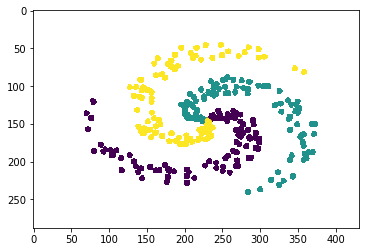

In [46]:
from matplotlib import pyplot as plt
plt.imshow(image.reshape(288,432,3))
plt.show()